Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

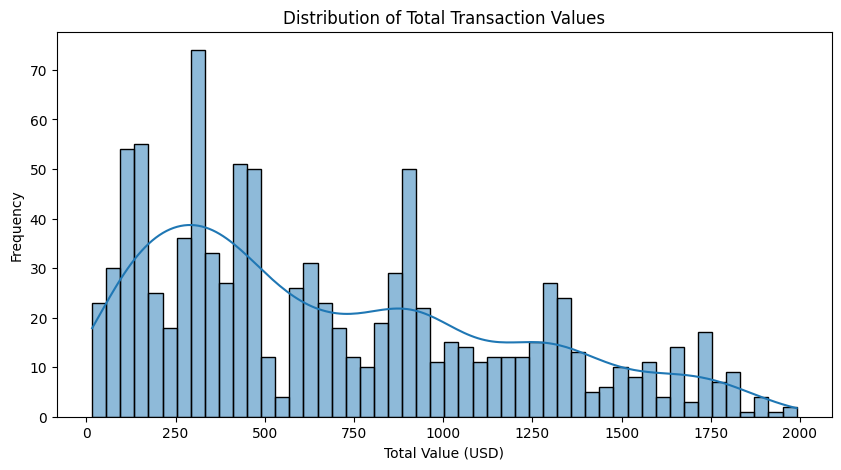

<ipython-input-1-54eedaad7226>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Region", order=data["Region"].value_counts().index, palette="viridis")


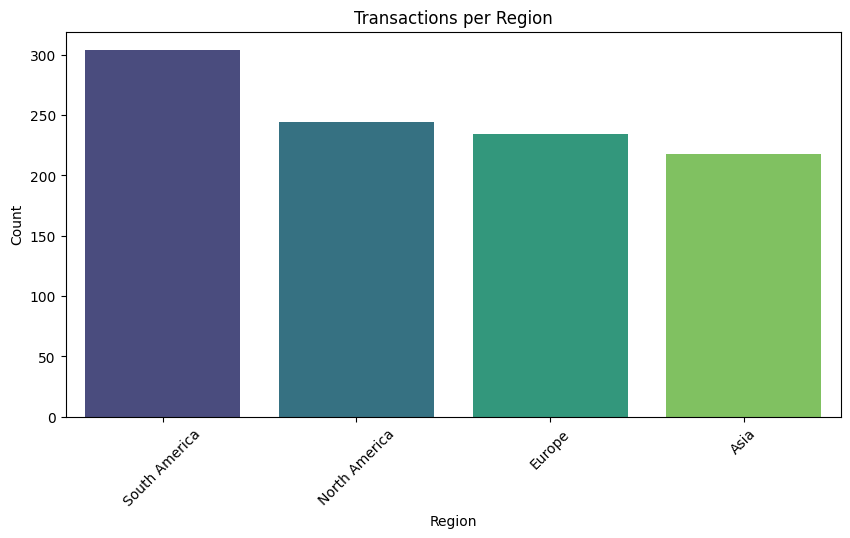

<ipython-input-1-54eedaad7226>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Category", order=data["Category"].value_counts().index, palette="coolwarm")


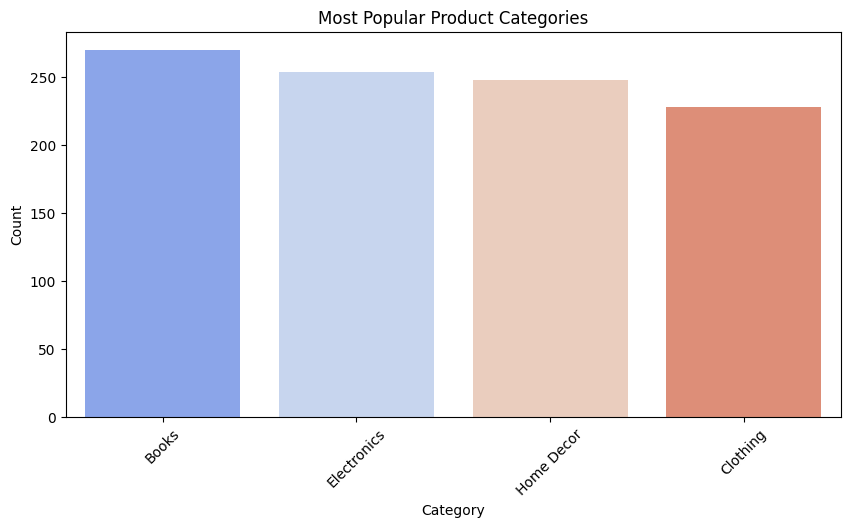

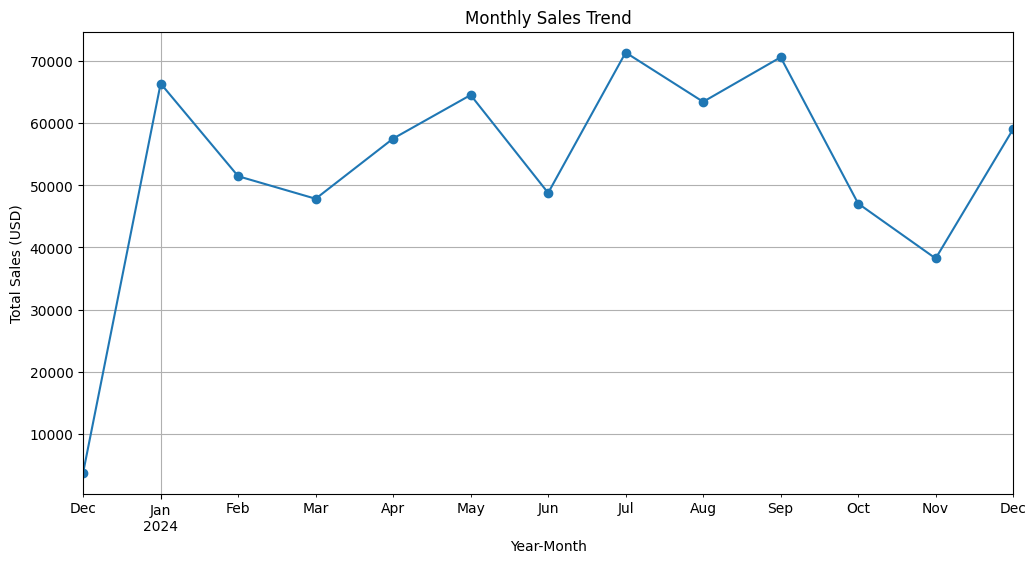

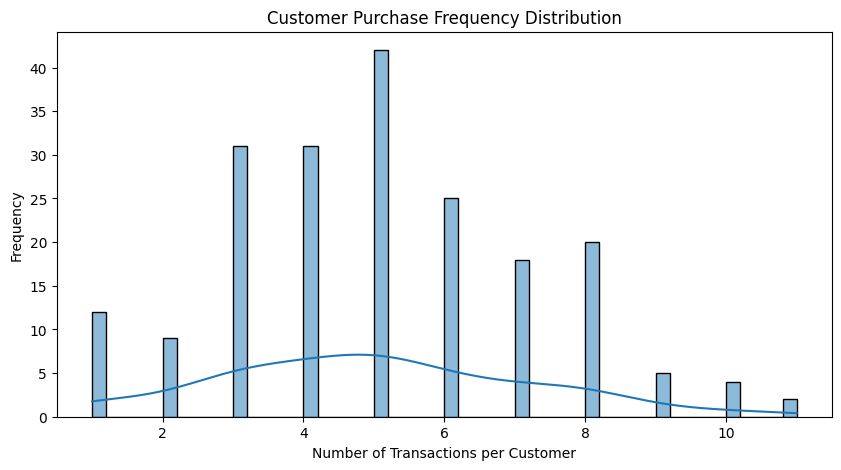

EDA completed successfully.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

# Display basic info about datasets
print("Customers Dataset Info:")
print(customers_df.info())
print("\nProducts Dataset Info:")
print(products_df.info())
print("\nTransactions Dataset Info:")
print(transactions_df.info())

# Check for missing values
print("\nMissing Values:")
print("Customers:")
print(customers_df.isnull().sum())
print("Products:")
print(products_df.isnull().sum())
print("Transactions:")
print(transactions_df.isnull().sum())

# Summary statistics
print("\nSummary Statistics for Transactions:")
print(transactions_df.describe())

# Merge datasets for analysis
data = transactions_df.merge(products_df, on="ProductID", how="left")
data = data.merge(customers_df, on="CustomerID", how="left")

# Convert dates to datetime format
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])
data["SignupDate"] = pd.to_datetime(data["SignupDate"], errors='coerce')

# Add additional features
data["DaysSinceSignup"] = (data["TransactionDate"] - data["SignupDate"]).dt.days

# Distribution of total transaction values
plt.figure(figsize=(10, 5))
sns.histplot(data["TotalValue"], bins=50, kde=True)
plt.title("Distribution of Total Transaction Values")
plt.xlabel("Total Value (USD)")
plt.ylabel("Frequency")
plt.show()

# Transactions per region
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="Region", order=data["Region"].value_counts().index, palette="viridis")
plt.title("Transactions per Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Most popular product categories
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="Category", order=data["Category"].value_counts().index, palette="coolwarm")
plt.title("Most Popular Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Time series analysis of transactions
data["YearMonth"] = data["TransactionDate"].dt.to_period("M")
monthly_sales = data.groupby("YearMonth")["TotalValue"].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker="o", linestyle="-")
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()

# Customer purchase frequency
customer_freq = data["CustomerID"].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(customer_freq, bins=50, kde=True)
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Transactions per Customer")
plt.ylabel("Frequency")
plt.show()

print("EDA completed successfully.")
